# COGS 108 - EDA Checkpoint

# Names

- Alan Wang
- An Huynh
- Hana Vaid
- Seung Huh
- Shreya Vanaki

<a id='research_question'></a>
# Research Question

According to Gallup’s World Happiness report’s dataset, which of the six measurements (GDP per capita, healthy life expectancy, social support, freedom to make life choices, generosity, corruption perception) most strongly predicts happiness across the countries surveyed ?:

- What indicator displays the largest difference in life satisfaction between the top 15% of the countries and the bottom 15% of the countries, in terms of the indicators of happiness?
- Which feature overall is the most strongly correlated with life satisfaction up to 2021?
- Which feature overall is the most strongly correlated with positive affect up to 2020?

# Setup

In [1]:
# Importing necessary libraries to use during the cleaning as well as the analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
# Preparing the csv files
df1 = pd.read_csv('./DataForFigure2.1WHR2021C2.csv')
df2 = pd.read_csv('./DataPanelWHR2021C2.csv')

# Data Cleaning

For our first and second question, we want the Gallup World Health Report to include all years upto 2021. Therefore, we need to combine both the data from 2021 and the data from earlier years into one.

After reading in both our csv datasets-df1 and df2- we proceeded to first clean df1 by selecting and renaming the columns and or categories we deemed essential to our research question for better formatting. To clean up df2, we renamed the columns we needed here as well to match them with the columns of df1. Moving on, both data frames were then concatenated, or linked and sorted by alphabetical order by country. We then used the dataframe.pop() method to remove columns that wouldn’t be relevant. Lastly, after manipulating and filtering these dataframes, we proceeded to reset the indices to make our data sequential. Our data is now in a usable format.

For our third question, because the 2021's data does not include the data for positive affect and negative affect, we use the data from earlier years and leave as is.

Apart from importing the necessary library packages and dataset and taking steps to clean and manipulate our datasets, there were no other pre-processing steps done.

In [3]:
# Cleaning up df1: Picking necessary columns, renaming the columns, inserting a column for proper concatenation
df1 = df1[['Country name', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
df1.columns = ['country_name', 'ladder_score', 'GDP', 'social_support', 'life_expectancy', 'choice_freedom', 'generosity', 'corr_perception']
df1.insert(loc=1, column='year', value=2021)

# Cleaning up df2: Renaming the columns
df2.columns = ['country_name', 'year', 'ladder_score', 'GDP', 'social_support', 'life_expectancy', 'choice_freedom', 'generosity', 'corr_perception', 'pos_affect', 'neg_affect']

In [4]:
# Concatenating the two data frames: First concatenate, sort by name and year, pop unnecessary columns, reset the indices
df1 = pd.concat([df1, df2])
df1 = df1.sort_values(['country_name', 'year'], ascending = True)
df1.pop('pos_affect')
df1.pop('neg_affect')
df1.reset_index(drop=True)

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,2017,3.638,8.016,0.754,55.000,0.753,-0.098,0.751
2094,Zimbabwe,2018,3.616,8.049,0.775,55.600,0.763,-0.068,0.844
2095,Zimbabwe,2019,2.694,7.950,0.759,56.200,0.632,-0.064,0.831
2096,Zimbabwe,2020,3.160,7.829,0.717,56.800,0.643,-0.009,0.789


In [5]:
# Drop all the rows with any NaN columns
df1.dropna(subset = ['ladder_score', 'GDP', 'social_support', 'life_expectancy', 'choice_freedom', 'generosity', 'corr_perception'], inplace = True)
df2.dropna(subset = ['ladder_score', 'GDP', 'social_support', 'life_expectancy', 'choice_freedom', 'generosity', 'corr_perception', 'pos_affect'], inplace = True)

# Data Analysis & Results (EDA)

In [6]:
df1.describe()

,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception
count,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000
mean,2013.896830,5.452041,9.328915,0.810520,63.360022,0.743653,-0.001872,0.749219
std,4.437147,1.131143,1.158199,0.121138,7.624643,0.141286,0.161176,0.185398
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000
25%,2010.000000,4.609000,8.399000,0.741000,58.300000,0.649000,-0.112000,0.695000
50%,2014.000000,5.371000,9.460000,0.834000,65.200000,0.763000,-0.027000,0.804000
75%,2018.000000,6.255000,10.291000,0.907000,68.800000,0.857000,0.088000,0.871000
max,2021.000000,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000


In [7]:
df2.describe()

,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception,pos_affect,neg_affect
count,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1708.000000
mean,2013.284962,5.446226,9.321264,0.810312,63.223461,0.739494,-0.000600,0.751049,0.709621,0.269446
std,4.076280,1.136414,1.158151,0.121603,7.685207,0.142821,0.162063,0.185986,0.108199,0.083083
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.094000
25%,2010.000000,4.595000,8.394000,0.741000,58.200000,0.644000,-0.111000,0.697000,0.623000,0.208000
50%,2013.000000,5.364000,9.456000,0.835000,65.100000,0.758000,-0.025000,0.806000,0.722000,0.259000
75%,2017.000000,6.258000,10.270000,0.908000,68.680000,0.852000,0.089000,0.875000,0.802000,0.319250
max,2020.000000,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000,0.944000,0.705000


## **Distributions and its descriptions**

We first want to see the distributions of each variable visually to spot any skewness for possible outliers that may exist (within df1 and df2, per category).

**Something to note**

Because df2 only lacks the data from year 2021, there isn't much of a difference when it comes shape, center, and variability. Hence, the following statements apply to both dataframes.

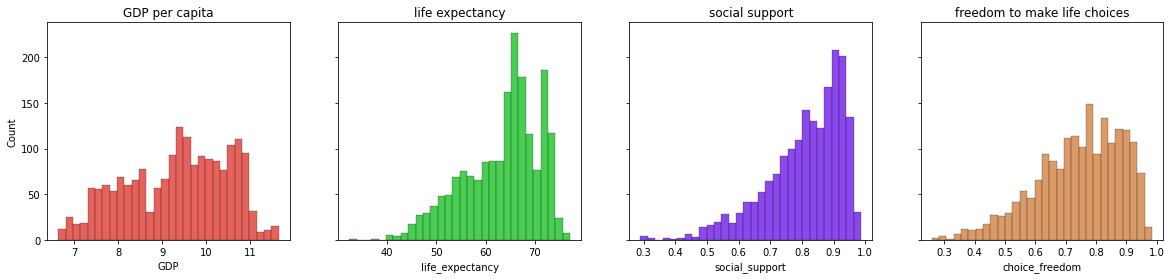

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.set_palette("flare")
sns.histplot(df1['GDP'], ax=ax1, kde=False, bins=30, color='#DE2D26')
ax1.set_title('GDP per capita')

sns.histplot(df1['life_expectancy'],ax=ax2, kde=False, bins=30, color='#0CBD18')
ax2.set_title('life expectancy')

sns.histplot(df1['social_support'],ax=ax3, kde=False, bins=30,color='#640BE8')
ax3.set_title('social support')

sns.histplot(df1['choice_freedom'],ax=ax4, kde=False, bins=30, color ='#CE7A36')
ax4.set_title('freedom to make life choices')
fig.set_figwidth(20)

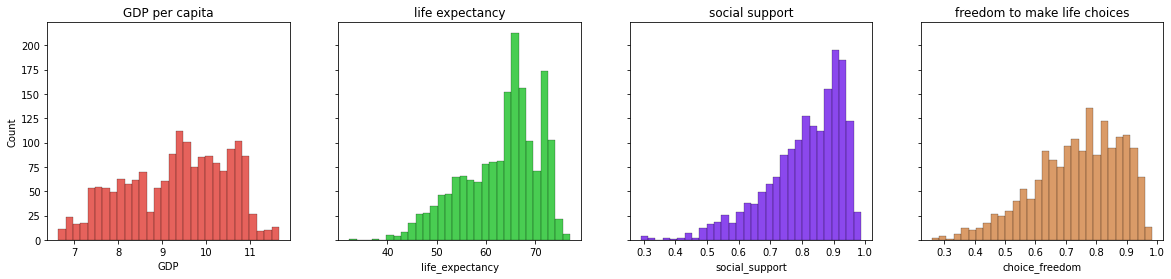

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.set_palette("flare")
sns.histplot(df2['GDP'], ax=ax1, kde=False, bins=30, color='#DE2D26')
ax1.set_title('GDP per capita')

sns.histplot(df2['life_expectancy'],ax=ax2, kde=False, bins=30, color='#0CBD18')
ax2.set_title('life expectancy')

sns.histplot(df2['social_support'],ax=ax3, kde=False, bins=30,color='#640BE8')
ax3.set_title('social support')

sns.histplot(df2['choice_freedom'],ax=ax4, kde=False, bins=30, color ='#CE7A36')
ax4.set_title('freedom to make life choices')
fig.set_figwidth(20)

- The distribution for GDP per capita appears to be fairly normally distributed. It appears to be centered around 9-10 dollars and is variable with a range of around 4-5 dollars.
- The distribution for average life expectancy appears to be slightly left skewed. It appears to be centered around 60-65 years and is variable with a range of around 40 years.
- The distribution for social support appears to be fairly left skewed. It appears to be centered around 0.8-0.85 and is variable with a range of around 0.9
- The distribution for freedom of life choices appears to be skewed to the left. It appears to be centered around0.72-0.75 and is variable with a range of around 0.55

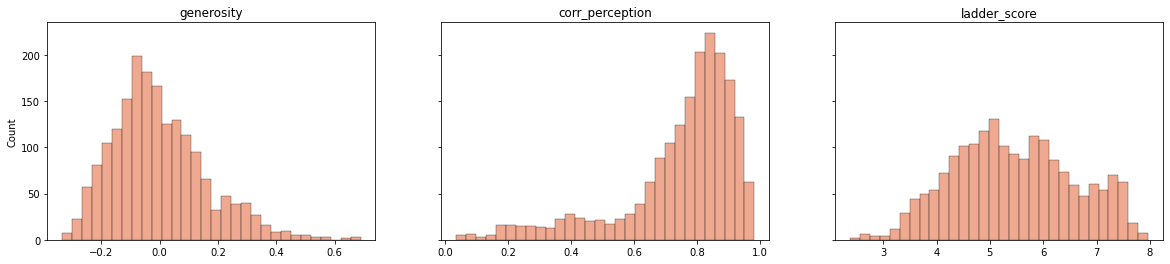

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.set_palette("flare")
sns.histplot(df1['generosity'], ax=ax1, kde=False, bins=30)
ax1.set_title('generosity')
ax1.set_xlabel('')
sns.histplot(df1['corr_perception'], ax=ax2, kde=False, bins=30)
ax2.set_title('corr_perception')
ax2.set_xlabel('')
sns.histplot(df1['ladder_score'], ax=ax3, kde=False, bins=30)
ax3.set_title('ladder_score')
ax3.set_xlabel('')
fig.set_figwidth(20)

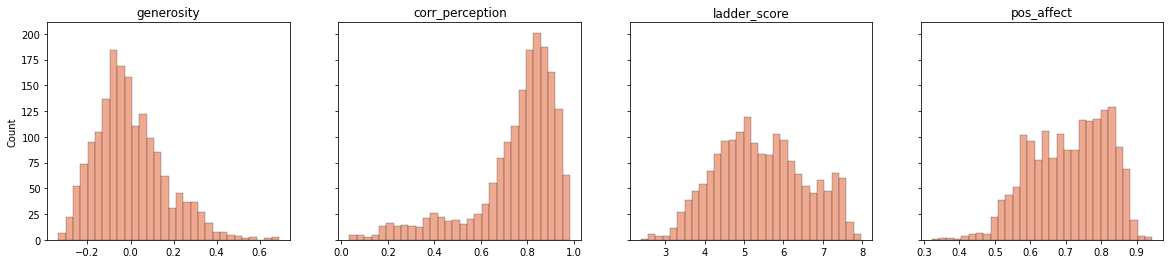

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.set_palette("flare")
sns.histplot(df2['generosity'], ax=ax1, kde=False, bins=30)
ax1.set_title('generosity')
ax1.set_xlabel('')
sns.histplot(df2['corr_perception'], ax=ax2, kde=False, bins=30)
ax2.set_title('corr_perception')
ax2.set_xlabel('')
sns.histplot(df2['ladder_score'], ax=ax3, kde=False, bins=30)
ax3.set_title('ladder_score')
ax3.set_xlabel('')
sns.histplot(df2['pos_affect'], ax=ax4, kde=False, bins=30)
ax4.set_title('pos_affect')
ax4.set_xlabel('')
fig.set_figwidth(20)

- The distribution for generosity appears to be skewed to the right. It appears to be centered around 0.1-0.15 and is variable with a range of around 0.7.
- The distribution for corruption perception seems to be skewed to the right. It appears to be centered from around 0.6-0.9, and is a variable with a range of around 0.85.
- The distribution for ladder_score appears to be fairly normally distributed. It appears to be centered from 4-6.5 and is variable with a range of around 5.
- The distribution for pos_affect score appears to be fairly normally distributed with a slight skew towards the right. It appears to be centered around 0.75-0.85 and is variable with a range of around 0.5.

**Catching outliers**

In [12]:
q1 = df1['life_expectancy'].quantile(.25)
q3 = df1['life_expectancy'].quantile(.75)
iqr = q3 - q1
upper_q = df1[df1['life_expectancy'] > q3 + (1.5 * iqr)]
lower_q = df1[df1['life_expectancy'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper_q, lower_q], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception
0,Central African Republic,2007,4.160,6.987,0.532,40.900,0.663,0.081,0.782
1,Haiti,2008,3.846,7.417,0.679,40.380,0.465,0.261,0.812
2,Haiti,2010,3.766,7.384,0.554,32.300,0.373,0.216,0.848
3,Haiti,2011,4.845,7.423,0.567,36.860,0.413,0.243,0.682
4,Haiti,2012,4.413,7.437,0.749,41.420,0.482,0.289,0.717
5,Sierra Leone,2006,3.628,7.136,0.561,40.300,0.679,0.101,0.836
6,Sierra Leone,2007,3.585,7.187,0.686,41.200,0.720,0.248,0.830
7,Sierra Leone,2008,2.997,7.215,0.591,42.100,0.716,0.148,0.925
8,Swaziland,2011,4.867,8.940,0.837,40.808,0.607,-0.067,0.917
9,Zimbabwe,2006,3.826,7.711,0.822,41.580,0.431,-0.076,0.905


There are 10 outliers in the health life expectancy column in df1.

In [13]:
q1 = df1['GDP'].quantile(.25)
q3 = df1['GDP'].quantile(.75)
iqr = q3 - q1
upper_q = df1[df1['GDP'] > q3 + (1.5 * iqr)]
lower_q = df1[df1['GDP'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper_q, lower_q], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception


There are absolutely no outlier in the GDP column in df1.

In [14]:
q1 = df1['social_support'].quantile(.25)
q3 = df1['social_support'].quantile(.75)
iqr = q3 - q1
upper_q = df1[df1['social_support'] > q3 + (1.5 * iqr)]
lower_q = df1[df1['social_support'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper_q, lower_q], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882
1,Afghanistan,2013,3.572,7.725,0.484,52.560,0.578,0.061,0.823
2,Afghanistan,2017,2.662,7.697,0.491,52.800,0.427,-0.121,0.954
3,Afghanistan,2019,2.375,7.697,0.420,52.400,0.394,-0.108,0.924
4,Afghanistan,2021,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
5,Bangladesh,2008,5.052,7.886,0.467,59.860,0.606,-0.044,0.802
6,Benin,2006,3.330,7.866,0.445,50.100,0.580,-0.011,0.790
7,Benin,2008,3.667,7.915,0.382,50.900,0.709,-0.004,0.825
8,Benin,2011,3.870,7.904,0.477,51.980,0.773,-0.142,0.849
9,Benin,2015,3.625,7.988,0.434,53.100,0.733,-0.027,0.850


There are 33 outliers in the social support column within df1.

In [15]:
q1 = df1['choice_freedom'].quantile(.25)
q3 = df1['choice_freedom'].quantile(.75)
iqr = q3 - q1
upper_q = df1[df1['choice_freedom'] > q3 + (1.5 * iqr)]
lower_q = df1[df1['choice_freedom'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper_q, lower_q], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception
0,Bosnia and Herzegovina,2009,4.963,9.296,0.735,66.48,0.258,-0.026,0.959
1,Bosnia and Herzegovina,2011,4.995,9.333,0.725,66.74,0.333,-0.035,0.925
2,Burundi,2008,3.563,6.719,0.291,49.02,0.260,-0.019,0.860
3,Chad,2006,3.435,7.360,0.724,43.18,0.306,0.028,0.961
4,Chad,2007,4.141,7.359,0.479,43.66,0.295,-0.011,0.874
5,Haiti,2016,3.352,7.477,0.584,55.30,0.304,0.291,0.839
6,Iraq,2012,4.660,9.246,0.730,59.12,0.315,-0.020,0.789
7,Madagascar,2008,4.640,7.439,0.776,54.92,0.332,-0.099,0.773
8,Pakistan,2008,4.414,8.271,0.373,55.40,0.335,0.100,0.848
9,Togo,2008,2.808,7.052,0.291,50.18,0.287,-0.055,0.932


There are 10 outliers in the freedom of choice column in df1.

In [16]:
q1 = df2['life_expectancy'].quantile(.25)
q3 = df2['life_expectancy'].quantile(.75)
iqr = q3 - q1
upper_q = df2[df2['life_expectancy'] > q3 + (1.5 * iqr)]
lower_q = df2[df2['life_expectancy'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper_q, lower_q], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception,pos_affect,neg_affect
0,Central African Republic,2007,4.160,6.987,0.532,40.900,0.663,0.081,0.782,0.568,0.330
1,Haiti,2008,3.846,7.417,0.679,40.380,0.465,0.261,0.812,0.608,0.256
2,Haiti,2010,3.766,7.384,0.554,32.300,0.373,0.216,0.848,0.555,0.293
3,Haiti,2011,4.845,7.423,0.567,36.860,0.413,0.243,0.682,0.625,0.245
4,Haiti,2012,4.413,7.437,0.749,41.420,0.482,0.289,0.717,0.593,0.284
5,Sierra Leone,2006,3.628,7.136,0.561,40.300,0.679,0.101,0.836,0.505,0.381
6,Sierra Leone,2007,3.585,7.187,0.686,41.200,0.720,0.248,0.830,0.582,0.290
7,Sierra Leone,2008,2.997,7.215,0.591,42.100,0.716,0.148,0.925,0.534,0.370
8,Swaziland,2011,4.867,8.940,0.837,40.808,0.607,-0.067,0.917,0.821,0.251
9,Zimbabwe,2006,3.826,7.711,0.822,41.580,0.431,-0.076,0.905,0.715,0.297


This shows us that the life expectancy column has 10 outliers in df2.

In [17]:
q1 = df2['GDP'].quantile(.25)
q3 = df2['GDP'].quantile(.75)
iqr = q3 - q1
upper_q = df2[df2['GDP'] > q3 + (1.5 * iqr)]
lower_q = df2[df2['GDP'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper_q, lower_q], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception,pos_affect,neg_affect


This shows that GDP has no outliers in df2.

In [18]:
q1 = df2['social_support'].quantile(.25)
q3 = df2['social_support'].quantile(.75)
iqr = q3 - q1
upper_q = df2[df2['social_support'] > q3 + (1.5 * iqr)]
lower_q = df2[df2['social_support'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper_q, lower_q], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception,pos_affect,neg_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
2,Afghanistan,2019,2.375,7.697,0.420,52.40,0.394,-0.108,0.924,0.351,0.502
3,Bangladesh,2008,5.052,7.886,0.467,59.86,0.606,-0.044,0.802,0.725,0.232
4,Benin,2006,3.330,7.866,0.445,50.10,0.580,-0.011,0.790,0.587,0.309
5,Benin,2008,3.667,7.915,0.382,50.90,0.709,-0.004,0.825,0.584,0.303
6,Benin,2011,3.870,7.904,0.477,51.98,0.773,-0.142,0.849,0.626,0.219
7,Benin,2015,3.625,7.988,0.434,53.10,0.733,-0.027,0.850,0.592,0.373
8,Benin,2017,4.853,8.021,0.436,53.90,0.727,-0.065,0.767,0.615,0.458
9,Benin,2019,4.976,8.098,0.442,54.70,0.770,-0.016,0.698,0.659,0.441


This shows us 29 rows of outliers from the 'social support' column in df2.

In [19]:
q1 = df2['choice_freedom'].quantile(.25)
q3 = df2['choice_freedom'].quantile(.75)
iqr = q3 - q1
upper_q = df2[df2['choice_freedom'] > q3 + (1.5 * iqr)]
lower_q = df2[df2['choice_freedom'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper_q, lower_q], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception,pos_affect,neg_affect
0,Bosnia and Herzegovina,2009,4.963,9.296,0.735,66.48,0.258,-0.026,0.959,0.572,0.390
1,Burundi,2008,3.563,6.719,0.291,49.02,0.260,-0.019,0.860,0.440,0.253
2,Chad,2006,3.435,7.360,0.724,43.18,0.306,0.028,0.961,0.580,0.263
3,Chad,2007,4.141,7.359,0.479,43.66,0.295,-0.011,0.874,0.614,0.245
4,Haiti,2016,3.352,7.477,0.584,55.30,0.304,0.291,0.839,0.553,0.367
5,Iraq,2012,4.660,9.246,0.730,59.12,0.315,-0.020,0.789,0.423,0.449
6,Madagascar,2008,4.640,7.439,0.776,54.92,0.332,-0.099,0.773,0.614,0.215
7,Togo,2008,2.808,7.052,0.291,50.18,0.287,-0.055,0.932,0.362,0.379


This shows us 8 rows of outliers from the freedom of choice column in df2.

In [20]:
q1 = df1['generosity'].quantile(.25)
q3 = df1['generosity'].quantile(.75)

iqr = q3 - q1

upper = df1[df1['generosity'] > q3 + (1.5 * iqr)]
lower = df1[df1['generosity'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper, lower], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception
0,Cambodia,2011,4.161,7.960,0.716,58.880,0.927,0.418,0.775
1,Gambia,2018,4.922,7.671,0.685,55.000,0.719,0.440,0.691
2,Gambia,2019,5.164,7.699,0.694,55.300,0.677,0.410,0.798
3,Gambia,2021,5.051,7.686,0.690,55.160,0.697,0.424,0.746
4,Haiti,2006,3.754,7.407,0.694,48.460,0.449,0.401,0.854
5,Haiti,2018,3.615,7.477,0.538,55.700,0.591,0.422,0.720
6,Haiti,2021,3.615,7.477,0.540,55.700,0.593,0.422,0.721
7,Indonesia,2010,5.457,9.022,0.816,60.400,0.700,0.448,0.954
8,Indonesia,2011,5.173,9.069,0.825,60.620,0.878,0.438,0.962
9,Indonesia,2014,5.597,9.190,0.905,61.280,0.719,0.408,0.970


There are 37 rows with generosity outliers using the IQR method.

In [21]:
q1 = df1['corr_perception'].quantile(.25)
q3 = df1['corr_perception'].quantile(.75)

iqr = q3 - q1

upper = df1[df1['corr_perception'] > q3 + (1.5 * iqr)]
lower = df1[df1['corr_perception'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper, lower], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception
0,Australia,2010,7.450,10.722,0.955,72.20,0.932,0.317,0.366
1,Australia,2011,7.406,10.733,0.967,72.30,0.945,0.369,0.382
2,Australia,2012,7.196,10.754,0.945,72.40,0.935,0.274,0.368
3,Australia,2015,7.309,10.779,0.952,72.70,0.922,0.332,0.357
4,Australia,2016,7.250,10.791,0.942,73.00,0.922,0.239,0.399
...,...,...,...,...,...,...,...,...,...
162,United Arab Emirates,2009,6.866,10.975,0.885,66.28,0.849,0.019,0.339
163,United Arab Emirates,2010,7.097,10.914,0.912,66.40,0.878,0.057,0.355
164,United Kingdom,2012,6.881,10.664,0.935,71.46,0.889,0.371,0.425
165,United Kingdom,2017,7.103,10.736,0.937,72.10,0.813,0.291,0.419


There are 167 rows with corr_perception outliers using the IQR method.

In [22]:
q1 = df1['ladder_score'].quantile(.25)
q3 = df1['ladder_score'].quantile(.75)

iqr = q3 - q1

upper = df1[df1['ladder_score'] > q3 + (1.5 * iqr)]
lower = df1[df1['ladder_score'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper, lower], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception


There are no ladder_score outliers using the IQR method.

In [23]:
q1 = df2['generosity'].quantile(.25)
q3 = df2['generosity'].quantile(.75)

iqr = q3 - q1

upper = df2[df2['generosity'] > q3 + (1.5 * iqr)]
lower = df2[df2['generosity'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper, lower], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception,pos_affect,neg_affect
0,Cambodia,2011,4.161,7.960,0.716,58.88,0.927,0.418,0.775,0.799,0.308
1,Gambia,2018,4.922,7.671,0.685,55.00,0.719,0.440,0.691,0.804,0.379
2,Gambia,2019,5.164,7.699,0.694,55.30,0.677,0.410,0.798,0.773,0.401
3,Haiti,2006,3.754,7.407,0.694,48.46,0.449,0.401,0.854,0.613,0.332
4,Haiti,2018,3.615,7.477,0.538,55.70,0.591,0.422,0.720,0.584,0.359
5,Indonesia,2010,5.457,9.022,0.816,60.40,0.700,0.448,0.954,0.837,0.218
6,Indonesia,2011,5.173,9.069,0.825,60.62,0.878,0.438,0.962,0.864,0.273
7,Indonesia,2014,5.597,9.190,0.905,61.28,0.719,0.408,0.970,0.852,0.242
8,Indonesia,2015,5.043,9.225,0.809,61.50,0.779,0.471,0.946,0.876,0.274
9,Indonesia,2016,5.136,9.262,0.792,61.70,0.830,0.500,0.890,0.833,0.342


There are 33 rows with generosity outliers using the IQR method.

In [24]:
q1 = df2['corr_perception'].quantile(.25)
q3 = df2['corr_perception'].quantile(.75)

iqr = q3 - q1

upper = df2[df2['corr_perception'] > q3 + (1.5 * iqr)]
lower = df2[df2['corr_perception'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper, lower], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception,pos_affect,neg_affect
0,Australia,2010,7.450,10.722,0.955,72.20,0.932,0.317,0.366,0.834,0.220
1,Australia,2011,7.406,10.733,0.967,72.30,0.945,0.369,0.382,0.816,0.195
2,Australia,2012,7.196,10.754,0.945,72.40,0.935,0.274,0.368,0.811,0.214
3,Australia,2015,7.309,10.779,0.952,72.70,0.922,0.332,0.357,0.790,0.210
4,Australia,2016,7.250,10.791,0.942,73.00,0.922,0.239,0.399,0.791,0.236
...,...,...,...,...,...,...,...,...,...,...,...
148,United Arab Emirates,2009,6.866,10.975,0.885,66.28,0.849,0.019,0.339,0.770,0.287
149,United Arab Emirates,2010,7.097,10.914,0.912,66.40,0.878,0.057,0.355,0.763,0.233
150,United Kingdom,2012,6.881,10.664,0.935,71.46,0.889,0.371,0.425,0.844,0.184
151,United Kingdom,2017,7.103,10.736,0.937,72.10,0.813,0.291,0.419,0.759,0.210


There are 153 rows with corr_perception outliers using the IQR method.

In [25]:
q1 = df2['ladder_score'].quantile(.25)
q3 = df2['ladder_score'].quantile(.75)

iqr = q3 - q1

upper = df2[df2['ladder_score'] > q3 + (1.5 * iqr)]
lower = df2[df2['ladder_score'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper, lower], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception,pos_affect,neg_affect


There are no ladder_score outliers using the IQR method.

In [26]:
q1 = df2['pos_affect'].quantile(.25)
q3 = df2['pos_affect'].quantile(.75)

iqr = q3 - q1

upper = df2[df2['pos_affect'] > q3 + (1.5 * iqr)]
lower = df2[df2['pos_affect'] < q1 - (1.5 * iqr)] 
outliers = pd.concat([upper, lower], ignore_index=True, sort=False)
outliers

,country_name,year,ladder_score,GDP,social_support,life_expectancy,choice_freedom,generosity,corr_perception,pos_affect,neg_affect
0,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
1,Lebanon,2019,4.024,9.597,0.866,67.6,0.447,-0.081,0.890,0.322,0.494


There are two rows with pos_affect outliers using the IQR method.

While we are aware of the outliers' existence, we are going to preserve the data as is as we are looking at the top 15% and the bottom 15% of the data later on. If we were to simply remove the outliers from our data, it defeats the purpose of looking at the extreme ends.

## **Relationships**

**Relationships between categories**

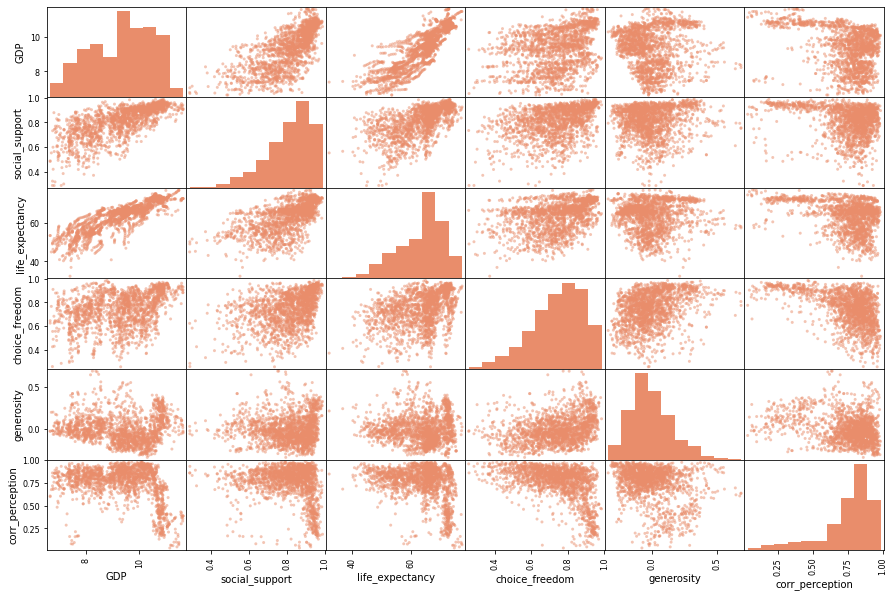

In [27]:
# Plot scatter matrix for 6 indicators for happiness 
fig=pd.plotting.scatter_matrix(df1[['GDP','social_support','life_expectancy','choice_freedom','generosity', 'corr_perception']], figsize=(15, 10));

From this scatter matrix, we can see that GDP, freedom to make life choices, social support, and life expectancy are all positively correlated with one another. Generosity does not seem to be correlated with any indicators, and perception of corruption appears to be weakly negatively correlated with the four indicators mentioned previously.

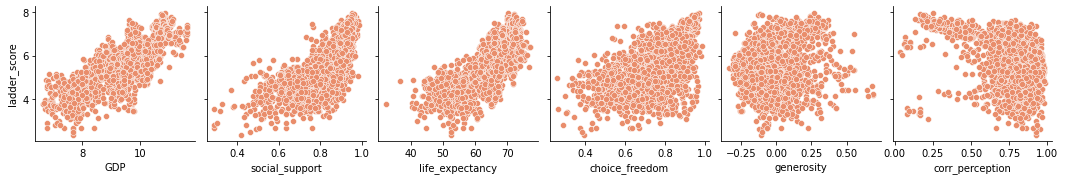

In [28]:
# Plot scatter matrix for 6 indicators vs ladder score (life satisfaction)
ax = sns.pairplot(df1,
    x_vars=['GDP','social_support','life_expectancy','choice_freedom','generosity', 'corr_perception'],
    y_vars=['ladder_score']
)

From this set of scatterplots, we can see that for each country in a given year, GDP, social support, life expectancy, and freedom to make life choices all appear to be positively correlated with that country's Gallup's ladder score (measure of life satisfcation). However, freedom to make life choices has a noticably weaker correlation. Generosity does not seem to have a correlation, while perception of corruption appears to have a weak negative correlation with ladder score.

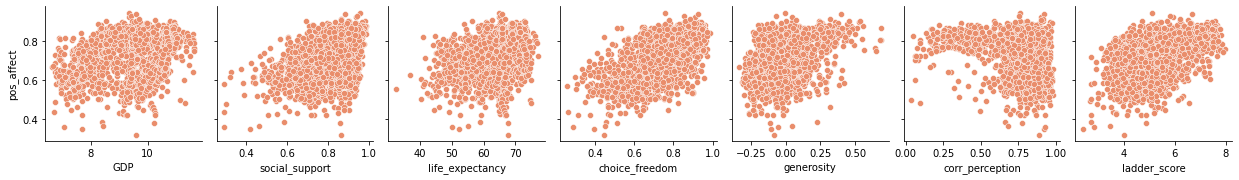

In [29]:
# Plot scatter matrix for 6 indicators + life satisfcation vs positive affect (measure of feeling happiness)
ax = sns.pairplot(df2,
    x_vars=['GDP','social_support','life_expectancy','choice_freedom','generosity', 'corr_perception', 'ladder_score'],
    y_vars=['pos_affect']
)

From this set of scatterplots, we can see that for each country in a given year, social support, freedom to make life choices, and laddre score appear to be positively correlated with positive affect, while generosity appears to have a weaker correlation. Perception of corruption also has a weaker negative correlation with positive affect. GDP and life expectancy do not appear to have any correlation with positive affect.

**Relationships between top 15% and bottom 15% countries for each indicator**

[Text(0.5, 0, 'bot 15% GDP')]

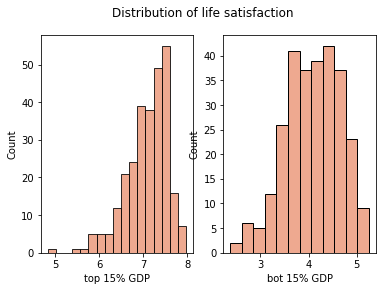

In [30]:
# Compare life satisfaction of top 15% GDP with bottom 15% GDP
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('GDP', ascending = True)
bot15_gdp = df1_copy.head(int(len(df1_copy) * 0.15))
top15_gdp = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction')
ax1 = sns.histplot(x = 'ladder_score', data=top15_gdp, ax=axes[0])
axes[0].set(xlabel='top 15% GDP')
ax2 = sns.histplot(x = 'ladder_score', data=bot15_gdp, ax=axes[1])
axes[1].set(xlabel='bot 15% GDP')

The distribution of life satisfaction for the top 15% countries in terms of GDP appears to be less variable and centered around 7-8 ladder score, while the distribution of life satisfaction for the bottom 15% in terms of GDP appears to be more variable and centered around 4 ladder score.

[Text(0.5, 0, 'bot 15% Social support')]

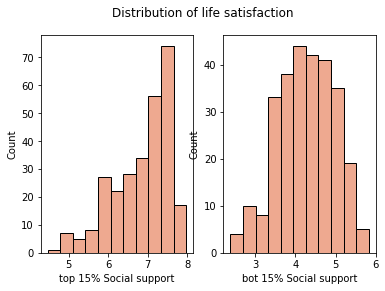

In [31]:
# Compare life satisfaction of top 15% social support with bottom 15% social support 
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('social_support', ascending = True)
bot15_ss = df1_copy.head(int(len(df1_copy) * 0.15))
top15_ss = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction')
ax1 = sns.histplot(x = 'ladder_score', data=top15_ss, ax=axes[0])
axes[0].set(xlabel='top 15% Social support')
ax2 = sns.histplot(x = 'ladder_score', data=bot15_ss, ax=axes[1])
axes[1].set(xlabel='bot 15% Social support')

The distribution of life satisfaction for the top 15% countries in terms of social support appears to be centered around 7-8 ladder score, while the distribution of life satisfaction for the bottom 15% in terms of social support centered around 4-5 ladder score. Both distributions appear to have the same spread.

[Text(0.5, 0, 'bot 15% life expectancy')]

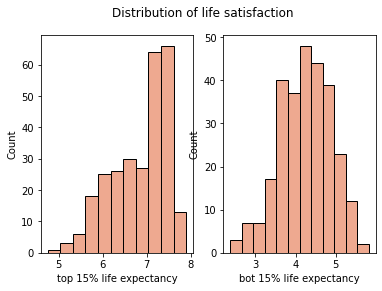

In [32]:
# Compare life satisfaction of top 15% life expectancy with bottom 15% life expectancy 
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('life_expectancy', ascending = True)
bot15_le = df1_copy.head(int(len(df1_copy) * 0.15))
top15_le = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction')
ax1 = sns.histplot(x = 'ladder_score', data=top15_le, ax=axes[0])
axes[0].set(xlabel='top 15% life expectancy')
ax2 = sns.histplot(x = 'ladder_score', data=bot15_le, ax=axes[1])
axes[1].set(xlabel='bot 15% life expectancy')

The distribution of life satisfaction for the top 15% countries in terms of life expectancy appears to be more variable and centered around 6-7 ladder score, while the distribution of life satisfaction for the bottom 15% in terms of social support appears to be less variable and centered around 4-5 ladder score.

[Text(0.5, 0, 'bot 15% choice freedom')]

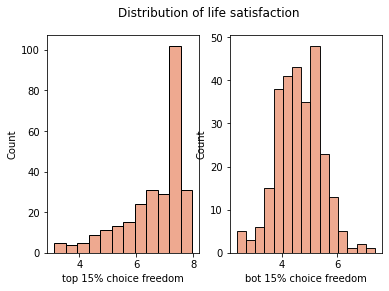

In [33]:
# Compare life satisfaction of top 15% choice freedom with bottom 15% choice freedom
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('choice_freedom', ascending = True)
bot15_cf = df1_copy.head(int(len(df1_copy) * 0.15))
top15_cf = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction')
ax1 = sns.histplot(x = 'ladder_score', data=top15_cf, ax=axes[0])
axes[0].set(xlabel='top 15% choice freedom')
ax2 = sns.histplot(x = 'ladder_score', data=bot15_cf, ax=axes[1])
axes[1].set(xlabel='bot 15% choice freedom')

The distribution of life satisfaction for the top 15% countries in terms of choice freedom appears to be more variable and centered around 7 ladder score, while the distribution of life satisfaction for the bottom 15% in terms of social support appears to be less variable and centered around 4-5 ladder score.

[Text(0.5, 0, 'bot 15% generosity')]

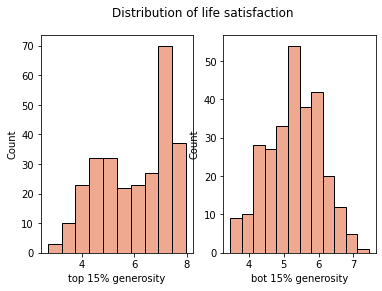

In [34]:
# Compare life satisfaction of top 15% generosity with bottom 15% generosity
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('generosity', ascending = True)
bot15_g = df1_copy.head(int(len(df1_copy) * 0.15))
top15_g = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction')
ax1 = sns.histplot(x = 'ladder_score', data=top15_g, ax=axes[0])
axes[0].set(xlabel='top 15% generosity')
ax2 = sns.histplot(x = 'ladder_score', data=bot15_g, ax=axes[1])
axes[1].set(xlabel='bot 15% generosity')

The distribution of life satisfaction for the top 15% countries in terms of generosity appears centered around 6-7 ladder score, while the distribution of life satisfaction for the bottom 15% in terms of generosity appears to be centered around 5-6 ladder score. Both distributions appear to have the same spread.

[Text(0.5, 0, 'bot 15% corruption perception')]

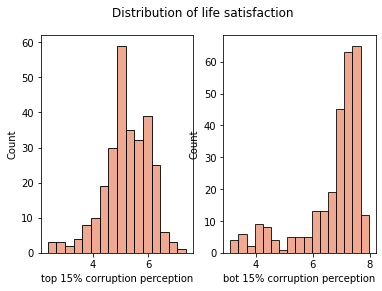

In [35]:
# Compare life satisfaction of top 15% corruption perception with bottom 15% corruption perception
# Separate top 15% and bottom 15%
df1_copy = df1.sort_values('corr_perception', ascending = True)
bot15_cp = df1_copy.head(int(len(df1_copy) * 0.15))
top15_cp = df1_copy.tail(int(len(df1_copy) * 0.15))

# Compare distributions of life satisfaction
fig, axes = plt.subplots(1, 2)
fig.suptitle('Distribution of life satisfaction')
ax1 = sns.histplot(x = 'ladder_score', data=top15_cp, ax=axes[0])
axes[0].set(xlabel='top 15% corruption perception')
ax2 = sns.histplot(x = 'ladder_score', data=bot15_cp, ax=axes[1])
axes[1].set(xlabel='bot 15% corruption perception')

The distribution of life satisfaction for the top 15% countries in terms of corruption perception appears to be less variable and centered around 5 ladder score, while the distribution of life satisfaction for the bottom 15% in terms of corruption perception appears to be more variable and centered around 6-7 ladder score.

Now, we would have see how the relationships are affected by the removal of the outliers from dataframes.